In [1]:
import numpy as np
import matplotlib.pyplot as plt

def Lattice(L):
    return(np.random.choice([-1, 1], size=(L, L)))

def E_ij(lattice, i, j,J):
    spin = lattice[i, j]
    L = len(lattice)
    neighbors_sum = lattice[(i + 1) % L, j] + lattice[i, (j + 1) % L] + lattice[(i - 1) % L, j] + lattice[i, (j - 1) % L]
    energy = -J*spin * neighbors_sum
    return energy

def E(lattice,J):
    total_energy = 0
    L = len(lattice)
    for i in range(L):
        for j in range(L):
            total_energy += E_ij(lattice, i, j,J)
    return total_energy

def MCC(lattice, T, J):
    L = len(lattice)
    for _ in range(L * L):
        i, j = np.random.randint(0, L, 2)
        spin = lattice[i, j]
        energy_change = 2 *J* spin * E_ij(lattice, i, j,J)
        if energy_change < 0 or np.random.rand() < np.exp(-energy_change / T):
            spin *= -1
            lattice[i, j] = spin

def view(lattice):
    plt.imshow(lattice, cmap='magma', interpolation='nearest')
    plt.title('Equilibrated 2D Ising Model')
    plt.colorbar()
    plt.show()

In [2]:
import time 

In [3]:
def data(args):
    lattice,N,T,J = args
    start = time.time()
    for _ in range(N):
         MCC(lattice, T, J)
    end = time.time()
    print(f"Equilibrated for temp {T} and time taken is {end-start}s")
    return (lattice,T)

In [4]:
from multiprocessing import Pool

def multi(args):
    lattice, T_start, T_end, steps, N, J = args
    if __name__ == "__main__" :
        start = time.time()
        T = np.linspace(T_start, T_end, steps)
        with Pool(processes=10) as pool:
            input_values = [(lattice, N, T[i], J) for i in range (len(T))]
            results = pool.map(data, input_values)
        end = time.time()
        print(f"Time taken to multi is {end-start}\n")
    return results

In [5]:
A = Lattice(16)
B = data((A,10000,2,1))

Equilibrated for temp 2 and time taken is 30.5051167011261s


In [6]:
R = multi((A,0.5,4,40,10000,1))

Equilibrated for temp 0.858974358974359 and time taken is 178.22564959526062s
Equilibrated for temp 1.217948717948718 and time taken is 182.5707061290741s
Equilibrated for temp 0.9487179487179487 and time taken is 187.72563886642456s
Equilibrated for temp 0.5897435897435898 and time taken is 187.99796223640442s
Equilibrated for temp 1.1282051282051282 and time taken is 188.1005506515503s
Equilibrated for temp 0.7692307692307692 and time taken is 189.09711146354675s
Equilibrated for temp 1.0384615384615383 and time taken is 189.40573716163635s
Equilibrated for temp 0.5 and time taken is 190.9456512928009s
Equilibrated for temp 0.6794871794871795 and time taken is 191.37865209579468s
Equilibrated for temp 1.3076923076923077 and time taken is 193.78392457962036s
Equilibrated for temp 1.3974358974358974 and time taken is 184.40729761123657s
Equilibrated for temp 1.8461538461538463 and time taken is 176.80492687225342s
Equilibrated for temp 1.4871794871794872 and time taken is 183.591219902

In [7]:
R = sorted(R, key=lambda tup: (tup[1]))  # Sort according to temperature

In [21]:
len(R)

40

0.6794871794871795


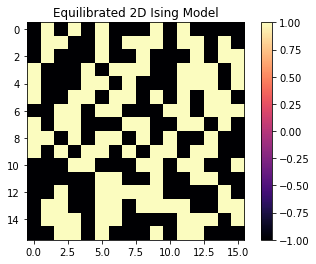

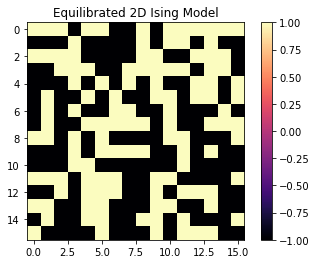

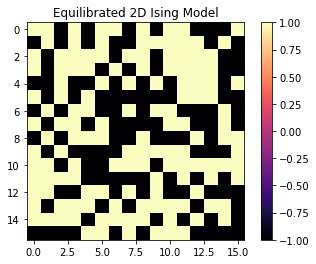

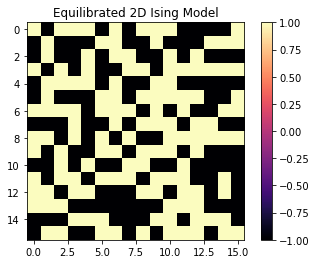

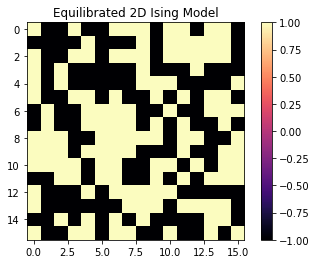

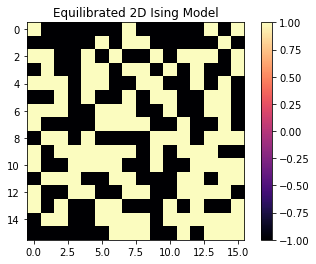

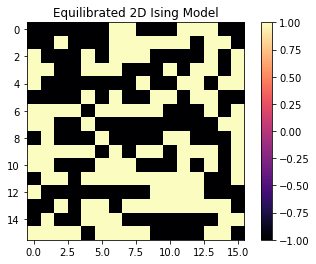

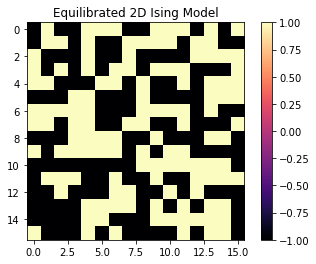

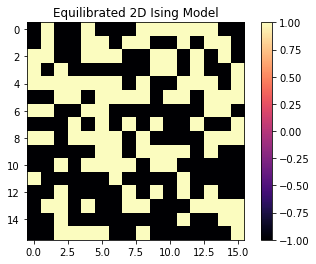

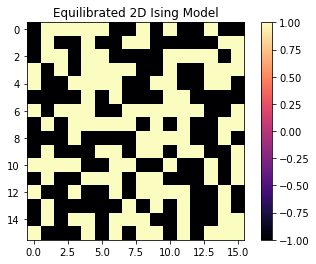

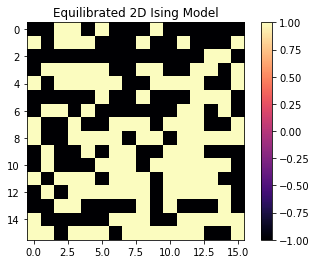

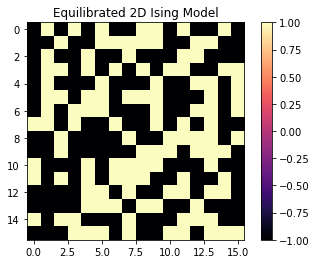

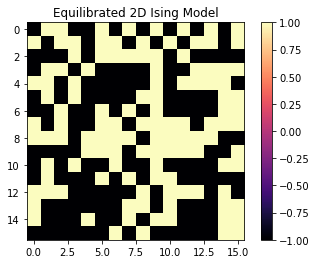

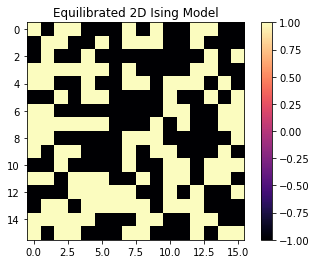

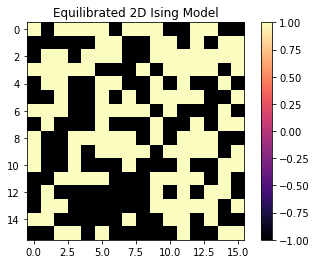

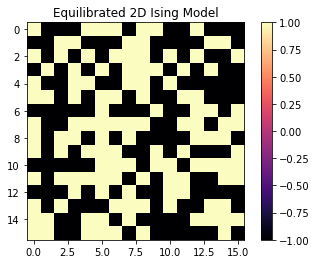

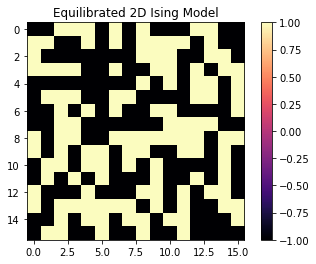

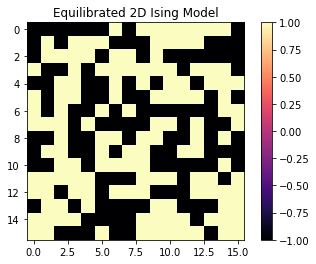

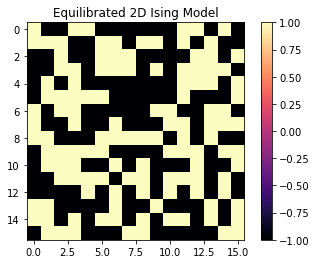

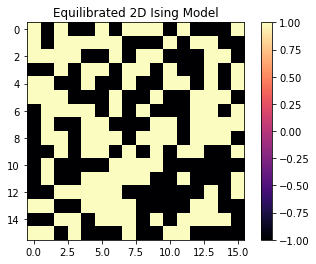

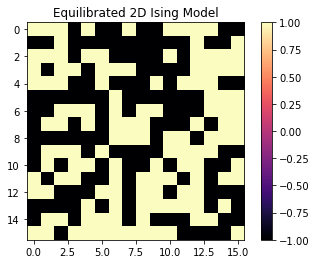

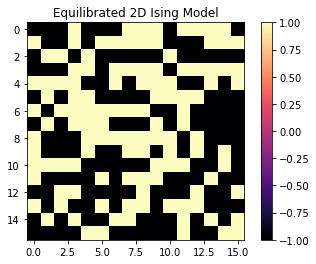

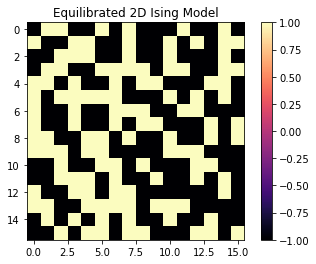

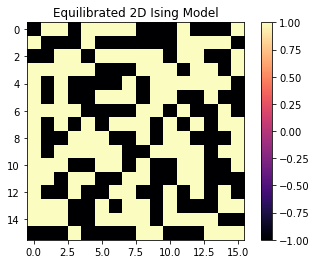

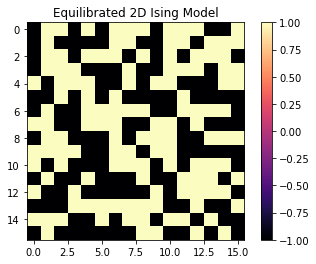

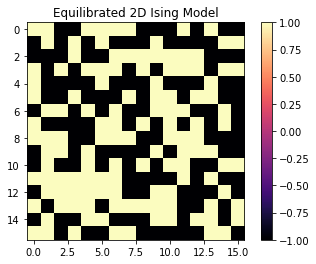

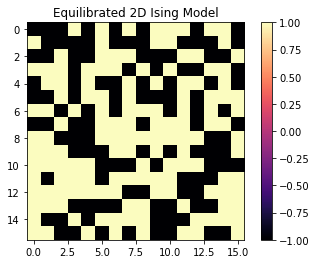

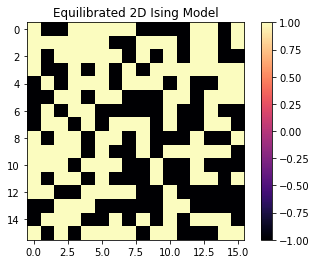

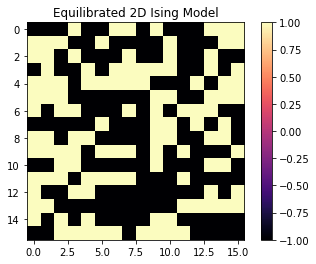

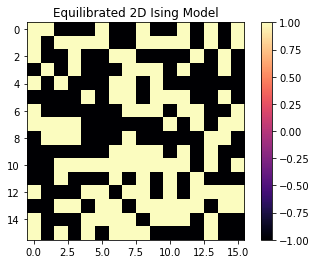

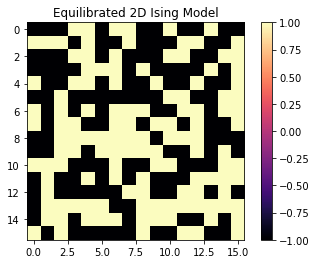

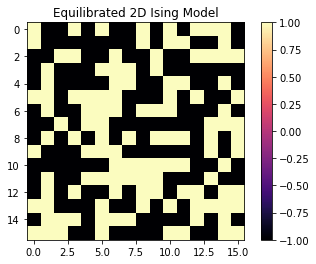

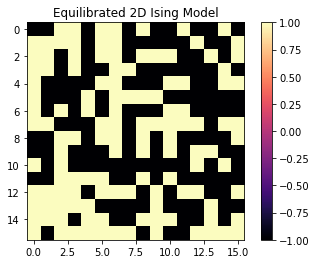

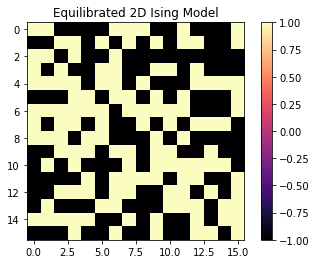

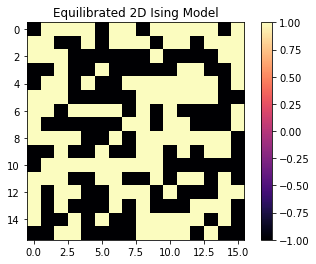

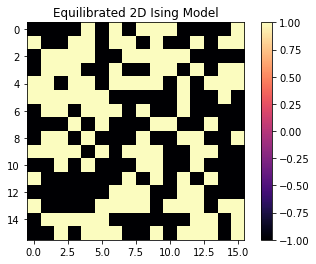

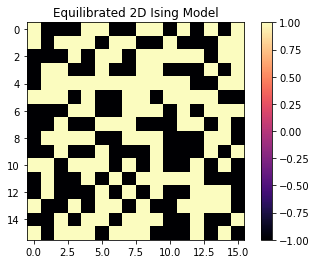

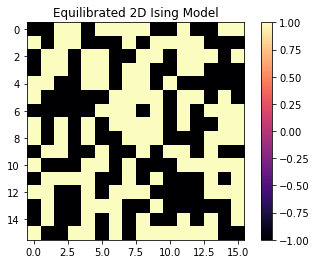

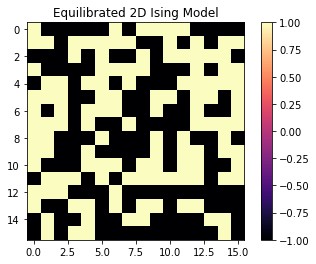

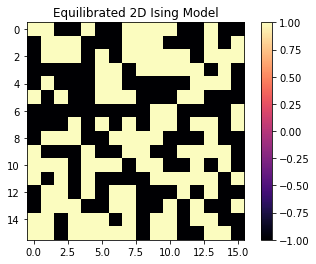

In [22]:
for i in range (len(R)):     
    view(R[i][0])

In [97]:
def snaps(args):
    start = time.time()
    lattice, N, interval, T, J = args
    count = 0
    snap = []
    for i in range(N):
        MCC(lattice,T,J)
        count+=0
        if count%interval == 0 :
            snap.append(lattice)
    end = time.time()
    print(f"Time taken for 1T and 100 snaps is {end - start}s\n")
    return snap
    
def get_data(R, N, interval, J):
    if __name__ == "__main__" :
        start = time.time()
        with Pool(processes=10) as pool:
            input_values = [(R[i][0], N, interval, R[i][1], J) for i in range (len(R))]
            results = pool.map(snaps, input_values)
        end = time.time()
        print(f"Time taken to multi is {end-start}s\n")
    return results

Time taken for 1T and 100 snaps is 33.52083206176758



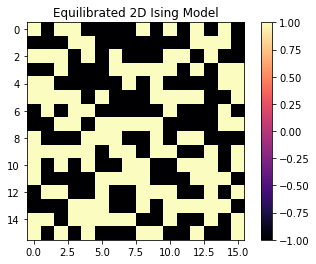

In [81]:
view(snaps((R[0][0],10000,100,R[0][1],1))[1])

In [83]:
snaps = get_data(R,10000, 100, 1)

Time taken for 1T and 100 snaps is 167.06634974479675s

Time taken for 1T and 100 snaps is 167.3143973350525s

Time taken for 1T and 100 snaps is 167.69253849983215s

Time taken for 1T and 100 snaps is 169.61181235313416s

Time taken for 1T and 100 snaps is 170.50083112716675s

Time taken for 1T and 100 snaps is 170.57017993927002s

Time taken for 1T and 100 snaps is 171.21890807151794s

Time taken for 1T and 100 snaps is 171.56164479255676s

Time taken for 1T and 100 snaps is 171.8100037574768s

Time taken for 1T and 100 snaps is 172.04169249534607s

Time taken for 1T and 100 snaps is 171.43072938919067s

Time taken for 1T and 100 snaps is 173.24000906944275s

Time taken for 1T and 100 snaps is 174.76266384124756s

Time taken for 1T and 100 snaps is 171.9540615081787s

Time taken for 1T and 100 snaps is 174.42146682739258s

Time taken for 1T and 100 snaps is 176.52756547927856s

Time taken for 1T and 100 snaps is 174.66000127792358s

Time taken for 1T and 100 snaps is 175.104126691818

In [84]:
import csv
csv_file_name = '16X16snaps.csv'
with open(csv_file_name, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(snaps)

In [ ]:
#####################  25 X 25 lattice ############################################

In [86]:
B = Lattice(25)

In [87]:
R2 = multi((B,0.5,4,40,10000,1))

Equilibrated for temp 1.1282051282051282 and time taken is 423.3997573852539s
Equilibrated for temp 0.5897435897435898 and time taken is 427.50790190696716s
Equilibrated for temp 0.7692307692307692 and time taken is 429.8409240245819s
Equilibrated for temp 0.6794871794871795 and time taken is 432.2578649520874s
Equilibrated for temp 0.858974358974359 and time taken is 432.34606671333313s
Equilibrated for temp 1.217948717948718 and time taken is 434.6593487262726s
Equilibrated for temp 1.0384615384615383 and time taken is 436.6525321006775s
Equilibrated for temp 0.5 and time taken is 437.8363552093506s
Equilibrated for temp 1.3076923076923077 and time taken is 439.76127576828003s
Equilibrated for temp 0.9487179487179487 and time taken is 444.67551374435425s
Equilibrated for temp 1.7564102564102564 and time taken is 422.34382128715515s
Equilibrated for temp 1.3974358974358974 and time taken is 433.6704430580139s
Equilibrated for temp 1.4871794871794872 and time taken is 434.8234746456146

In [95]:
R2 = sorted(R2, key=lambda tup: (tup[1]))

In [98]:
snaps2 = get_data(R2,10000, 100, 1)

Time taken for 1T and 100 snaps is 408.5364272594452s

Time taken for 1T and 100 snaps is 409.29844880104065s

Time taken for 1T and 100 snaps is 412.5236942768097s

Time taken for 1T and 100 snaps is 413.1361107826233s

Time taken for 1T and 100 snaps is 413.77393412590027s

Time taken for 1T and 100 snaps is 414.3887257575989s

Time taken for 1T and 100 snaps is 414.9646210670471s

Time taken for 1T and 100 snaps is 415.94205689430237s

Time taken for 1T and 100 snaps is 416.53672099113464s

Time taken for 1T and 100 snaps is 417.1257703304291s

Time taken for 1T and 100 snaps is 419.6196813583374s

Time taken for 1T and 100 snaps is 418.65324687957764s

Time taken for 1T and 100 snaps is 425.0801029205322s
Time taken for 1T and 100 snaps is 421.11809968948364s


Time taken for 1T and 100 snaps is 419.1127414703369s

Time taken for 1T and 100 snaps is 420.2342269420624s

Time taken for 1T and 100 snaps is 424.5619173049927s

Time taken for 1T and 100 snaps is 424.08070516586304s

Tim

In [99]:
csv_file_name = '25X25snaps.csv'
with open(csv_file_name, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(snaps2)

In [100]:
C = Lattice(40)

In [101]:
R3 = multi((C,0.5,4,40,10000,1))

Equilibrated for temp 1.0384615384615383 and time taken is 1055.2563908100128s
Equilibrated for temp 0.858974358974359 and time taken is 1058.9742033481598s
Equilibrated for temp 1.1282051282051282 and time taken is 1061.5818374156952s
Equilibrated for temp 0.6794871794871795 and time taken is 1062.749328136444s
Equilibrated for temp 0.5897435897435898 and time taken is 1063.4492790699005s
Equilibrated for temp 1.3076923076923077 and time taken is 1063.9157316684723s
Equilibrated for temp 0.9487179487179487 and time taken is 1064.445501089096s
Equilibrated for temp 0.5 and time taken is 1065.709781885147s
Equilibrated for temp 1.217948717948718 and time taken is 1065.9855148792267s
Equilibrated for temp 0.7692307692307692 and time taken is 1066.7161071300507s
Equilibrated for temp 1.5769230769230769 and time taken is 1056.0774319171906sEquilibrated for temp 1.8461538461538463 and time taken is 1053.6918606758118s

Equilibrated for temp 1.3974358974358974 and time taken is 1066.43853878

In [102]:
R3 = sorted(R3, key=lambda tup: (tup[1]))

In [103]:
snaps3 = get_data(R3,10000, 100, 1)

Time taken for 1T and 100 snaps is 1054.5596191883087s

Time taken for 1T and 100 snaps is 1059.2716572284698s

Time taken for 1T and 100 snaps is 1066.9765820503235s

Time taken for 1T and 100 snaps is 1067.1781685352325s

Time taken for 1T and 100 snaps is 1068.2579939365387s

Time taken for 1T and 100 snaps is 1068.755296945572s

Time taken for 1T and 100 snaps is 1068.9104988574982s

Time taken for 1T and 100 snaps is 1069.6986639499664s

Time taken for 1T and 100 snaps is 1072.2603704929352s

Time taken for 1T and 100 snaps is 1077.40798330307s

Time taken for 1T and 100 snaps is 1060.6344695091248s

Time taken for 1T and 100 snaps is 1067.1353573799133s

Time taken for 1T and 100 snaps is 1059.8271753787994s

Time taken for 1T and 100 snaps is 1061.1843039989471s

Time taken for 1T and 100 snaps is 1059.7636337280273s

Time taken for 1T and 100 snaps is 1065.9584534168243s

Time taken for 1T and 100 snaps is 1066.9352853298187s

Time taken for 1T and 100 snaps is 1067.17637586593

In [104]:
csv_file_name = '40X40snaps.csv'
with open(csv_file_name, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(snaps3)